<a href="https://www.kaggle.com/code/yutodennou/model-futurocoinsaga-prophet?scriptVersionId=152263047" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🗃️Import Library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/futurocoin-saga-a-200-year-cryptocurrency-odyssey/futurocoin_dataset.csv


In [2]:
!pip install prophet
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import io

# 🔍Import data

In [3]:
df = pd.read_csv("/kaggle/input/futurocoin-saga-a-200-year-cryptocurrency-odyssey/futurocoin_dataset.csv")
df.shape

(73413, 2)

In [4]:
df.head(20)

,Date,Trading USD Value
0,2013-01-01,75.16
1,2013-01-02,85.09
2,2013-01-03,99.20
3,2013-01-04,144.97
4,2013-01-05,107.06
5,2013-01-06,101.53
6,2013-01-07,161.09
7,2013-01-08,88.71
8,2013-01-09,77.58
9,2013-01-10,51.00


In [5]:
df = df.rename(columns={'Date': 'ds','Trading USD Value': 'y'})

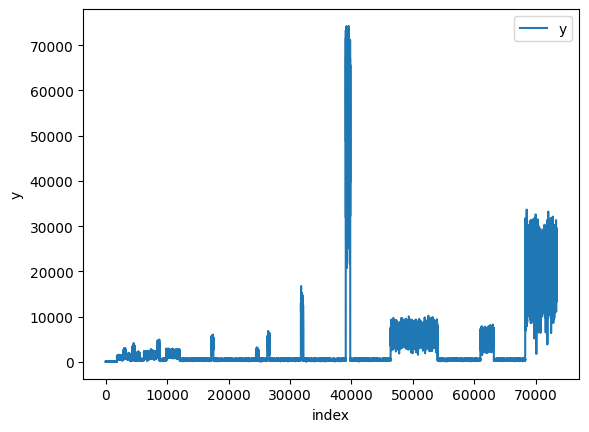

In [6]:
df.plot()
plt.xlabel('index')
plt.ylabel('y')
plt.show()

# 📈Make Prophet Model

In [7]:
model = Prophet()
model.fit(df)

13:25:19 - cmdstanpy - INFO - Chain [1] start processing
13:27:27 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Set the Period for Train
future_df = model.make_future_dataframe(365)
# Predict
forecast_df = model.predict(future_df)
forecast_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,52.023249,-6701.933567,6637.929811,52.023249,52.023249,48.196041,48.196041,48.196041,-0.062534,-0.062534,-0.062534,48.258576,48.258576,48.258576,0.0,0.0,0.0,100.219291
1,2013-01-02,52.317832,-6036.701534,6651.399705,52.317832,52.317832,64.254656,64.254656,64.254656,10.469664,10.469664,10.469664,53.784992,53.784992,53.784992,0.0,0.0,0.0,116.572488
2,2013-01-03,52.612415,-6655.960580,6338.433117,52.612415,52.612415,49.214639,49.214639,49.214639,-9.495973,-9.495973,-9.495973,58.710612,58.710612,58.710612,0.0,0.0,0.0,101.827053
3,2013-01-04,52.906997,-6989.128282,6568.535614,52.906997,52.906997,36.934977,36.934977,36.934977,-26.019923,-26.019923,-26.019923,62.954900,62.954900,62.954900,0.0,0.0,0.0,89.841975
4,2013-01-05,53.201580,-6338.941642,6009.069530,53.201580,53.201580,56.229641,56.229641,56.229641,-10.222789,-10.222789,-10.222789,66.452430,66.452430,66.452430,0.0,0.0,0.0,109.431221


13:28:00 - cmdstanpy - INFO - Chain [1] start processing
13:30:46 - cmdstanpy - INFO - Chain [1] done processing


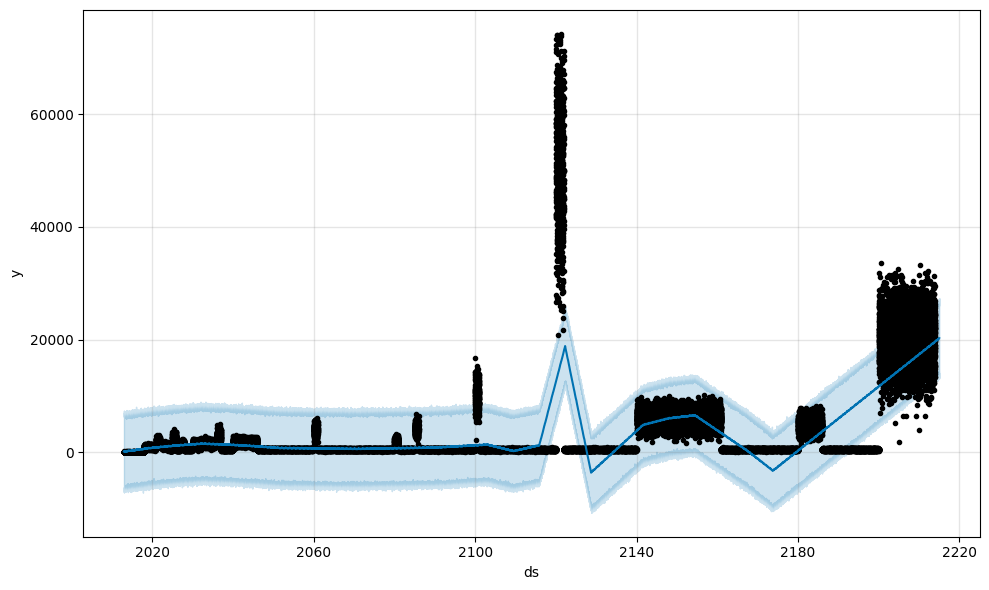

In [9]:
# Sellect the Seasonality
model = Prophet(daily_seasonality=False,
                weekly_seasonality=False,
                yearly_seasonality=True)
model.fit(df)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

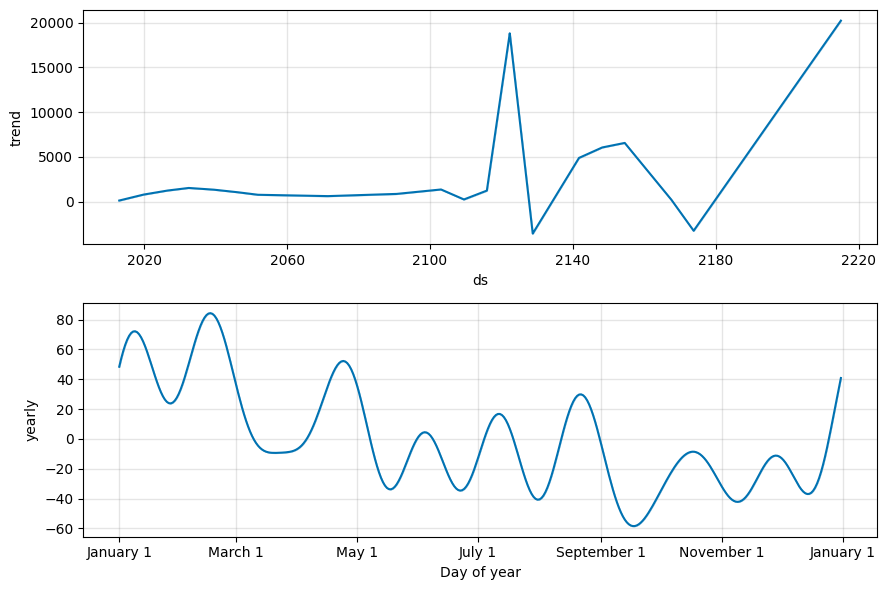

In [10]:
# Show Trend, Seasonal, Period Components
model.plot_components(forecast_df)
plt.show()

In [11]:
# Changepoint
changepoints_df = df.loc[model.changepoints.index]
changepoints_df['ds'] = changepoints_df['ds'].astype(str)
changepoints_df['delta'] = model.params['delta'].ravel()

# sns.set(style='whitegrid')
# ax = sns.factorplot(x='ds', y='delta', data=changepoints_df, kind='bar', height=6, aspect=2)
# ax.set_xticklabels(rotation=90)

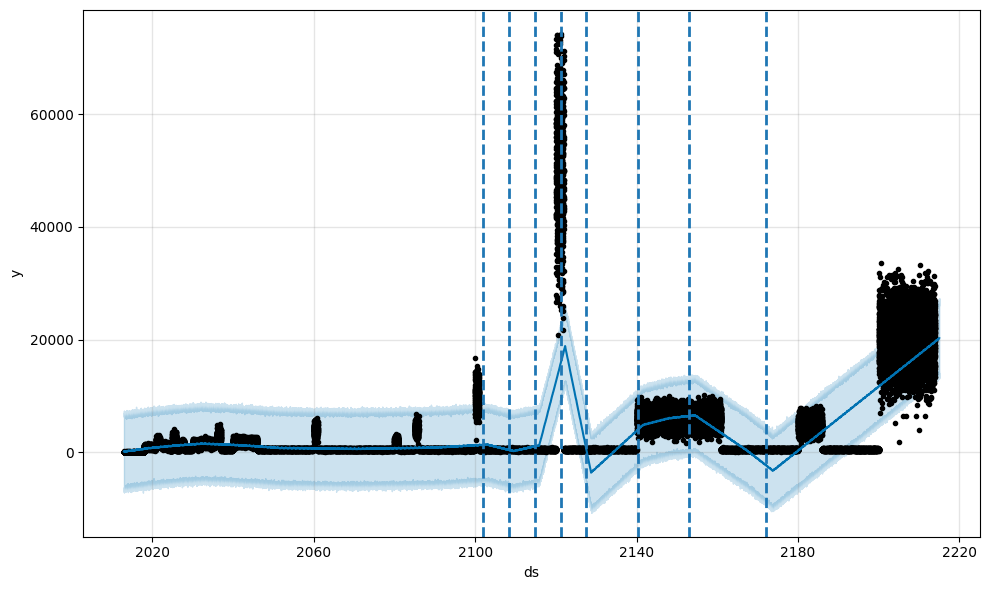

In [12]:
fig = model.plot(forecast_df)

tmp = changepoints_df[abs(changepoints_df['delta']) >= 0.4]
date_changepoints = tmp['ds'].astype('datetime64[ns]').reset_index(drop=True)

for dt in date_changepoints:
    plt.axvline(dt, ls='--', lw=2)
plt.show()

  0%|          | 0/402 [00:00<?, ?it/s]

13:32:42 - cmdstanpy - INFO - Chain [1] start processing
13:32:42 - cmdstanpy - INFO - Chain [1] done processing
13:32:43 - cmdstanpy - INFO - Chain [1] start processing
13:32:43 - cmdstanpy - INFO - Chain [1] done processing
13:32:43 - cmdstanpy - INFO - Chain [1] start processing
13:32:44 - cmdstanpy - INFO - Chain [1] done processing
13:32:44 - cmdstanpy - INFO - Chain [1] start processing
13:32:44 - cmdstanpy - INFO - Chain [1] done processing
13:32:45 - cmdstanpy - INFO - Chain [1] start processing
13:32:45 - cmdstanpy - INFO - Chain [1] done processing
13:32:46 - cmdstanpy - INFO - Chain [1] start processing
13:32:46 - cmdstanpy - INFO - Chain [1] done processing
13:32:47 - cmdstanpy - INFO - Chain [1] start processing
13:32:47 - cmdstanpy - INFO - Chain [1] done processing
13:32:48 - cmdstanpy - INFO - Chain [1] start processing
13:32:48 - cmdstanpy - INFO - Chain [1] done processing
13:32:49 - cmdstanpy - INFO - Chain [1] start processing
13:32:50 - cmdstanpy - INFO - Chain [1]

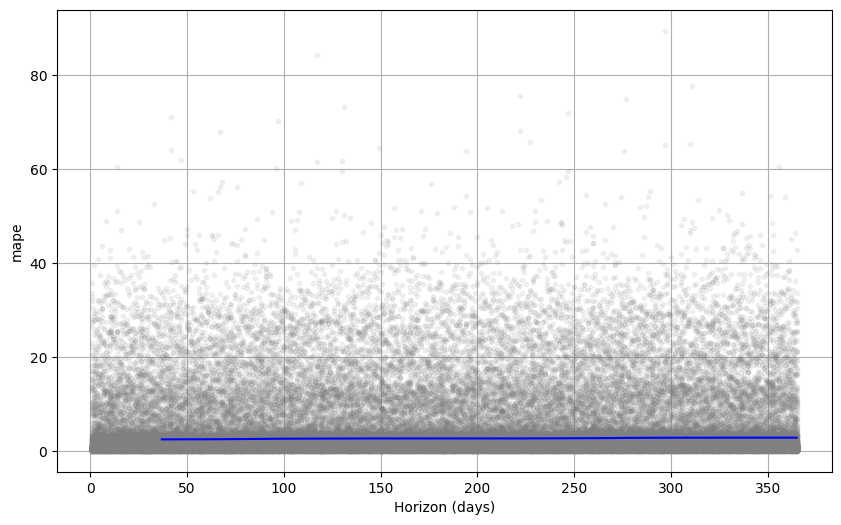

In [13]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

#評価値計算
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

#評価値描画
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')